# Introduction

## Teguh Samudra

This project is based on a Kaggle Competition [Titanic Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

# Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Data Preparation

In [2]:
raw_data = pd.read_csv('datasets/train.csv')

In [3]:
raw_data.shape

(891, 12)

In [4]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Cabin column has only about 1/4 of the rows that is non-null value. This column would not be usefull 

* Name is also not a usefull to predict survival.

* Ticket number is not a useful indicator. Instead, we will use Pclass to determine the passenger's class

* Age has some missing values and we will remove these rows from the analysis. 


## Remove Unnecessary Columns

In [ ]:
titanic = raw_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1).dropna(axis = 0, how = 'any')
titanic.shape

# Exploratory Data Analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

(712, 8)

## Distribution of Data

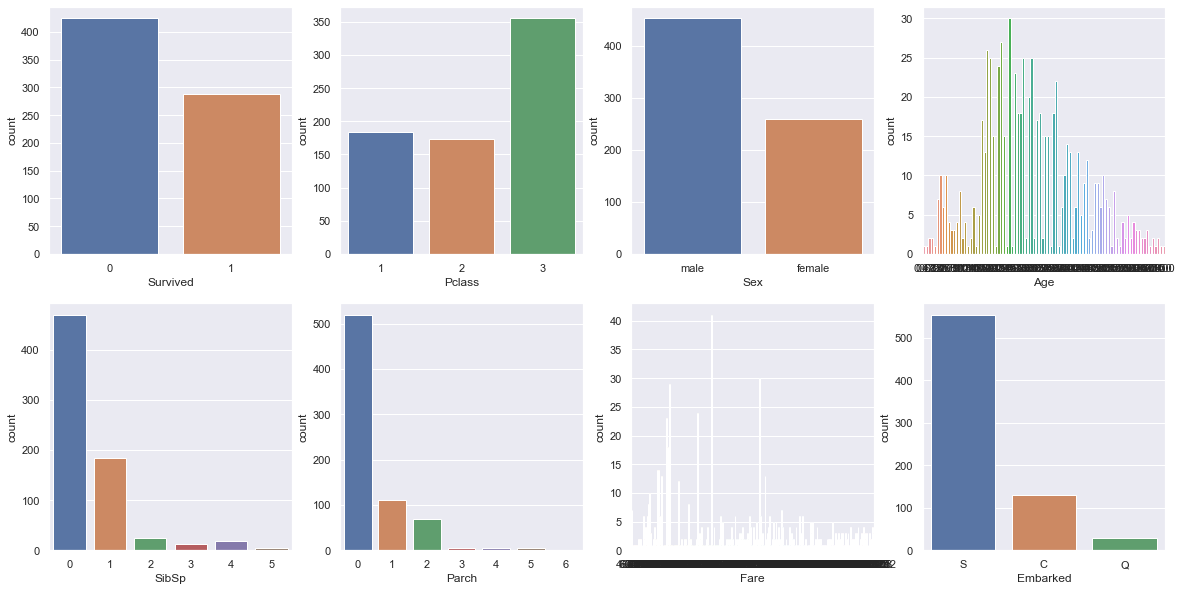

In [31]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for index, column in enumerate(titanic.columns):
    sns.countplot(titanic[column], ax = axes[index//4, index%4])

# Preprocessing for Machine Learning Algorithm

## Create Dummy Variables

In [53]:
titanic_dummied = pd.get_dummies(titanic, drop_first=True)
titanic_dummied

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [54]:
print("After adding dummy variables, the dataframe now has {} columns, and {} rows".format(titanic_dummied.shape[0], 
                                                                                           titanic_dummied.shape[1]))

After adding dummy variables, the dataframe now has 712 columns, and 9 rows


## Check the correlation between each variable

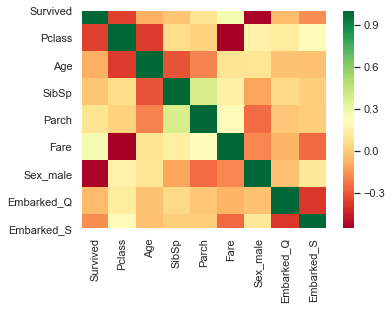

In [55]:
sns.heatmap(titanic_dummied.corr(), square=True, cmap='RdYlGn')

## Splitting Data

### Split into feature and target

In [58]:
feature_full = titanic_dummied.drop(columns=['Survived'])
target_full = titanic_dummied[['Survived']]
print("Length of feature: {} \nLength of target: {}".format(len(feature_full),len(target_full)))

Length of feature: 712 
Length of target: 712


### Split into training testing

In [59]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(feature_full, 
                                                                          target_full, 
                                                                          test_size = 0.2, 
                                                                          random_state = 42)

## Scaling